In [5]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 4.0.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
pandas 0.16.2
Sat Sep 12 19:56:44 2015 PDT

In [6]:
!pwd

/Users/berkeleyalmand/repos/ski_in_solitude


[autoreload of version_information failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named version_information
]


In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df_met = pd.DataFrame.from_csv('jan_to_mar_2015_met.csv', index_col = 1, parse_dates = True)

IOError: File jan_to_mar_2015_met.csv does not exist

In [ ]:
df_met.head()

In [8]:
df_met.drop(['WBAN',  
 'StationType', 
 'DryBulbFarenheit',
 'DryBulbFarenheitFlag',
 'DewPointFarenheit',
 'DewPointFarenheitFlag',
 'DewPointCelsius',
 'DewPointCelsiusFlag', 
 'WindDirection',
 'WindDirectionFlag',
 'ValueForWindCharacter',
 'ValueForWindCharacterFlag',
 'StationPressure',
 'StationPressureFlag',
 'PressureTendency',
 'PressureTendencyFlag',
 'PressureChange',
 'PressureChangeFlag',
 'SeaLevelPressure',
 'SeaLevelPressureFlag',
 'RecordType',
 'RecordTypeFlag',
 'Altimeter',
 'AltimeterFlag', 
 'DryBulbCelsiusFlag', 
 'WetBulbFarenheit', 
 'WetBulbFarenheitFlag', 
 'WetBulbCelsius'], inplace = True, axis=1)

In [9]:
df_met.head()

,Time,SkyCondition,SkyConditionFlag,Visibility,VisibilityFlag,WeatherType,WeatherTypeFlag,DryBulbCelsius,WetBulbCelsiusFlag,RelativeHumidity,RelativeHumidityFlag,WindSpeed,WindSpeedFlag,HourlyPrecip,HourlyPrecipFlag
Date,,,,,,,,,,,,,,,
2015-01-01,16,CLR,,10.00,,,,-8,,45,,10,,,
2015-01-01,36,CLR,,10.00,,,,-8,,45,,10,,,
2015-01-01,56,CLR,,10.00,,,,-8,,45,,13,,,
2015-01-01,116,CLR,,10.00,,,,-8,,45,,22,,,
2015-01-01,136,CLR,,10.00,,,,-7,,45,,21,,,


In [10]:
len(df_met)

5902

In [11]:
df_met = df_met[df_met.SkyConditionFlag != 's']
df_met = df_met[df_met.VisibilityFlag != 's']
df_met = df_met[df_met.WeatherTypeFlag != 's']
df_met = df_met[df_met.RelativeHumidityFlag != 's']
df_met = df_met[df_met.WetBulbCelsiusFlag != 's']
df_met = df_met[df_met.WindSpeedFlag != 's']
df_met = df_met[df_met.HourlyPrecipFlag  != 's']

In [12]:
len(df_met)

5630

In [13]:
df_met.drop(['SkyConditionFlag', 'VisibilityFlag', 'WeatherTypeFlag','WetBulbCelsiusFlag',
             'RelativeHumidityFlag', 'WindSpeedFlag','HourlyPrecipFlag'], inplace = True, axis=1)

In [14]:
df_met.head()

,Time,SkyCondition,Visibility,WeatherType,DryBulbCelsius,RelativeHumidity,WindSpeed,HourlyPrecip
Date,,,,,,,,
2015-01-01,16,CLR,10.00,,-8,45,10,
2015-01-01,36,CLR,10.00,,-8,45,10,
2015-01-01,56,CLR,10.00,,-8,45,13,
2015-01-01,116,CLR,10.00,,-8,45,22,
2015-01-01,136,CLR,10.00,,-7,45,21,


#Visibility

In [15]:
df_met.Visibility.unique()

array(['10.00', ' 7.00', ' 4.00', ' 1.50', ' 1.00', ' 0.75', ' 1.25',
       ' 2.00', ' 5.00', ' 1.75', ' 3.00', ' 2.50', ' 0.00', 'M', ' 0.50',
       ' 0.25'], dtype=object)

In [16]:
df_met.Visibility = df_met.Visibility.map(lambda x: np.nan if x == 'M' else x).astype(float)

In [17]:
df_met.Visibility.unique()

array([ 10.  ,   7.  ,   4.  ,   1.5 ,   1.  ,   0.75,   1.25,   2.  ,
         5.  ,   1.75,   3.  ,   2.5 ,   0.  ,    nan,   0.5 ,   0.25])

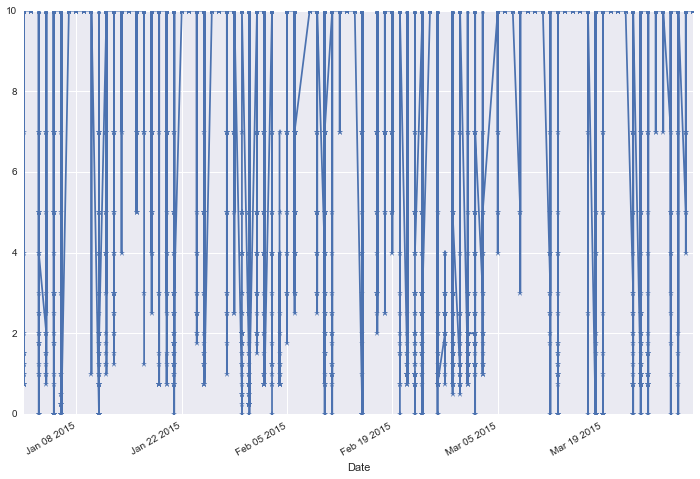

In [18]:
df_met.Visibility.plot(linestyle = '-', marker = '*')

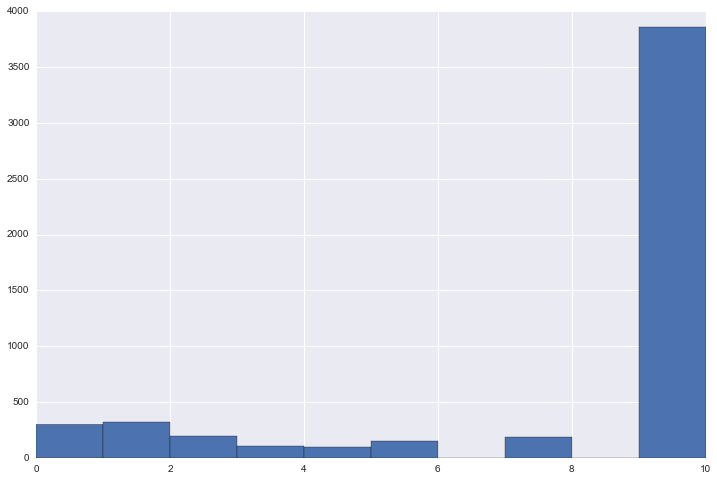

In [19]:
df_met.Visibility.hist()

#Precipitation Data 

In [20]:
#change empty strings to zeroes and datatype to floats
df_met.HourlyPrecip = df_met.HourlyPrecip.map(lambda x: '0.' if x == ' ' else x).astype(float)

In [21]:
df_met.HourlyPrecip.unique()

array([ 0.  ,  0.01,  0.03,  0.02,  0.04,  0.07,  0.09])

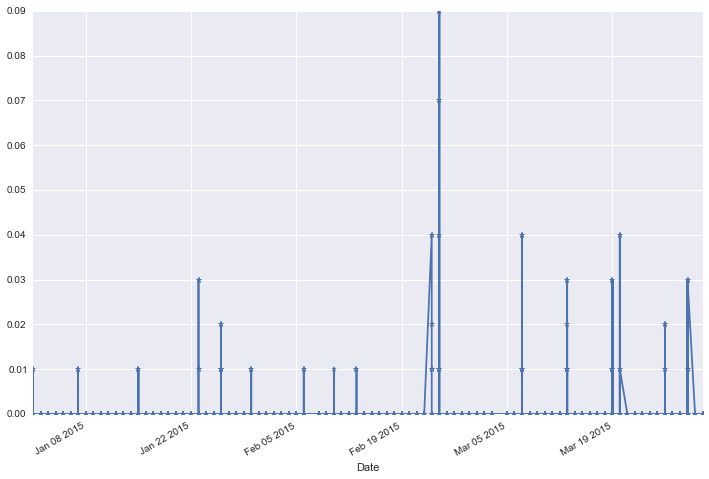

In [22]:
df_met.HourlyPrecip.plot(linestyle = '-', marker = '*')

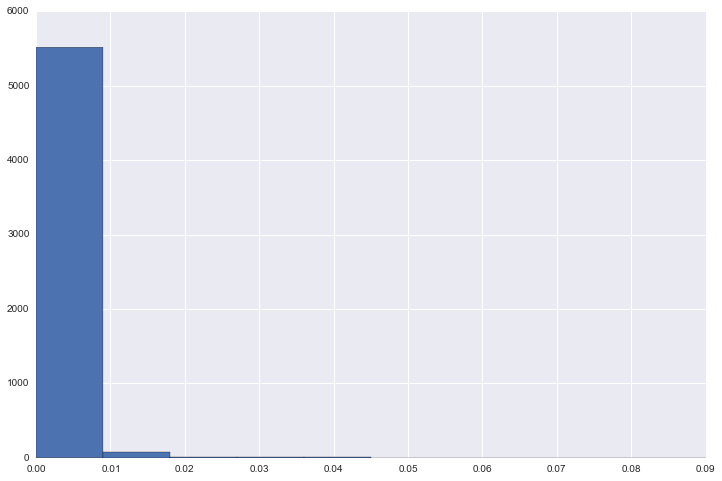

In [23]:
df_met.HourlyPrecip.hist()

#Weather Type

In [24]:
df_met.WeatherType.unique()

array([' ', '-SN', 'SN', 'HZ', 'FZFG', 'BR', '+SN', 'UP'], dtype=object)

In [25]:
df_met.WeatherType = df_met.WeatherType.map(lambda x: np.nan if x == ' ' else x)

In [26]:
df_met.WeatherType.unique()

array([nan, '-SN', 'SN', 'HZ', 'FZFG', 'BR', '+SN', 'UP'], dtype=object)

-SN = light snow,
SN = snow,
+SN = heavy snow,
HZ = haze,
UP = unknown precip,
BR = mist,
FZFG = freezing fog,

In [27]:
names = pd.Series(df_met.WeatherType.unique())
dict1 = dict(zip(names.values, names.index.values))

In [28]:
dict1

{nan: 0, '+SN': 6, '-SN': 1, 'BR': 5, 'FZFG': 4, 'HZ': 3, 'SN': 2, 'UP': 7}

In [29]:
weather_code = []
for weather_type in df_met.WeatherType:
    weather_code.append(dict1[weather_type])

In [30]:
df_met['WeatherType'] = weather_code

In [31]:
df_met.WeatherType.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

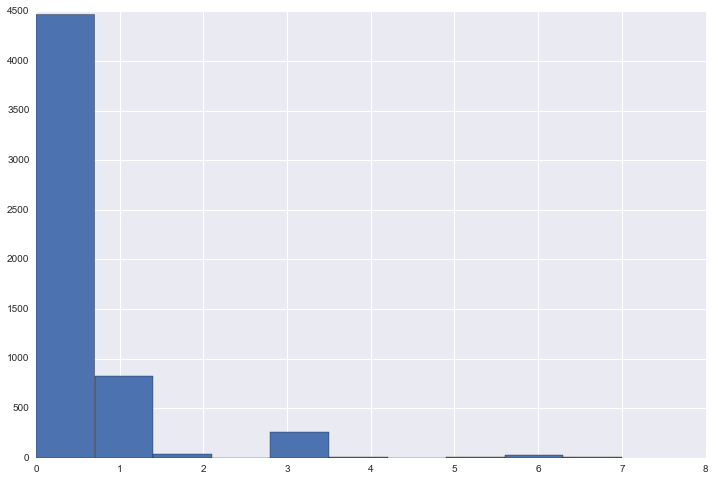

In [32]:
df_met.WeatherType.hist()

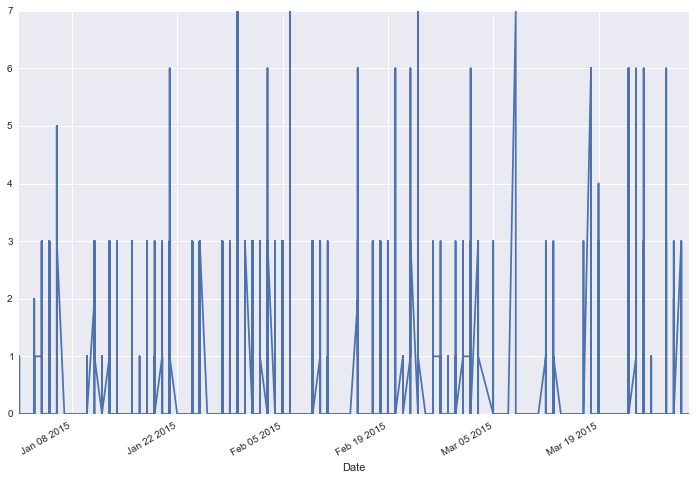

In [33]:
df_met.WeatherType.plot()

#Temperature

In [34]:
df_met.DryBulbCelsius.unique()

array([ -8.,  -7.,  -6.,  -5.,  -4.,  -9., -10., -11., -12., -13., -14.,
       -15.,  -3.,  -2.,   0.,  -1.,   1.,   2., -16., -17.,   3.,   4.,
         5.,   6.,   7.,   8.,  11.,  12.,   9.,  10.])

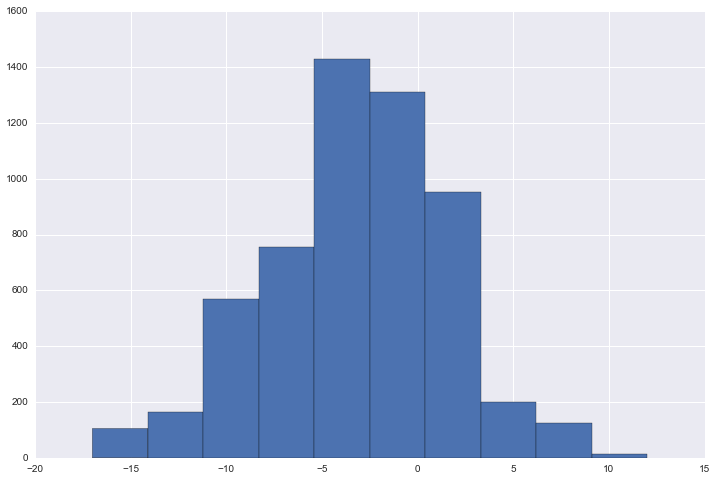

In [35]:
df_met.DryBulbCelsius.hist()

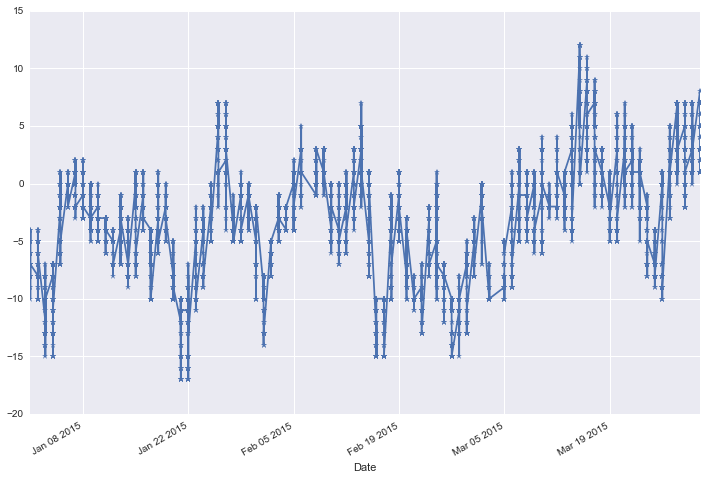

In [36]:
df_met.DryBulbCelsius.plot(marker = '*')

#Wind Speed

In [37]:
df_met.WindSpeed.unique()

array(['10', '13', '22', '21', '18', '20', ' 7', ' 0', ' 5', ' 8', '16',
       '14', ' 9', ' 6', '11', ' 3', '15', '17', '  ', '23', '24', '25',
       '31', '28', '30', '26', '29', '33', '34', '32', '36', '38', '41',
       '37', '43', '40', '39', '44'], dtype=object)

In [38]:
df_met.WindSpeed = df_met.WindSpeed.map(lambda x: np.nan if x == '  ' else x)

In [39]:
df_met.WindSpeed = df_met.WindSpeed.map(lambda x: int(x) if type(x) == str else x)

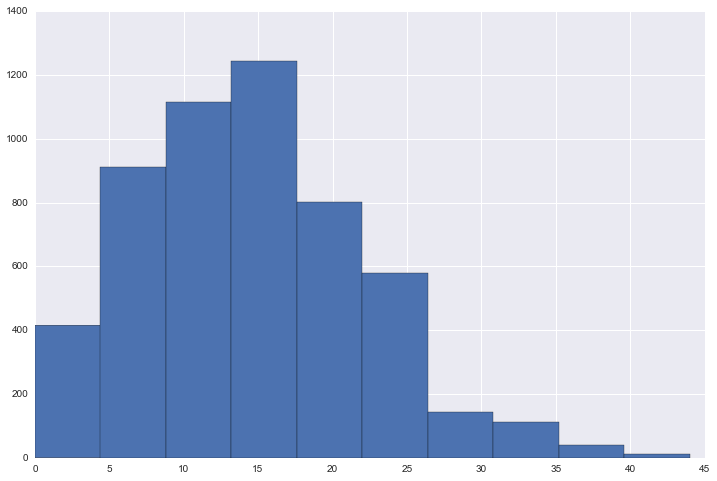

In [40]:
df_met.WindSpeed.hist()

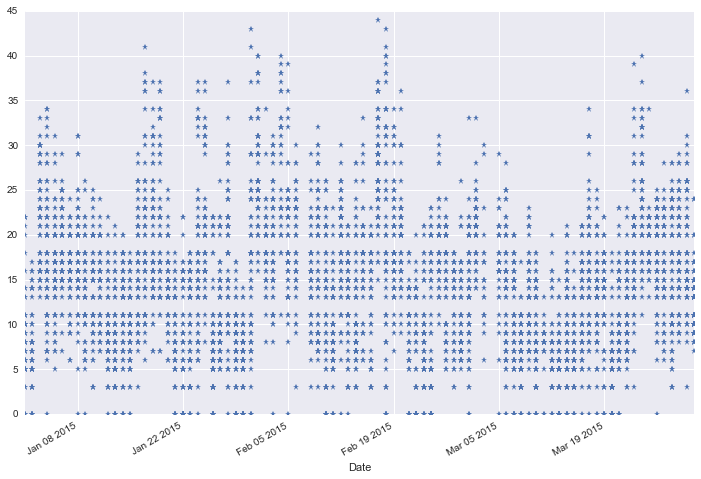

In [41]:
df_met.WindSpeed.plot(linestyle = ' ', marker = '*')

#Import Traffic Data Breck

In [42]:
df_traf = pd.DataFrame.from_csv('breck_traffic.csv', index_col = 27, parse_dates= True)

IOError: File breck_traffic.csv does not exist

In [ ]:
df_traf.head()

In [ ]:
df_traf.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [ ]:
df_traf_mar = choose_date_range(2015, 3, 1, 2015, 4, 1, df_traf)

In [ ]:
df_traf_mar_prim, df_traf_mar_sec = separate_traffic_directions(df_traf_mar)

In [ ]:
df_traf_mar_prim, df_traf_mar_sec = sum_morning_evening_and_drop_hourly(df_traf_mar_prim, df_traf_mar_sec)

##Weekends: (March 1, 7, 8, 14, 15, 21, 22, 28, 29)

In [ ]:
df_traf_mar_prim.morning.plot(marker = "*")

In [ ]:
df_traf_mar_prim.evening.plot(marker = "*")

In [ ]:
df_traf_mar_sec.morning.plot(marker = "*")

In [ ]:
df_traf_mar_sec.evening.plot(marker = "*")

###January

In [ ]:
df_traf_jan = choose_date_range(2015, 1, 1, 2015, 2, 1, 'January', df_traf)

In [ ]:
df_traf_jan_prim, df_traf_jan_sec = separate_traffic_directions(df_traf_jan)

In [ ]:
df_traf_jan_prim, df_traf_jan_sec = sum_morning_evening_and_drop_hourly(df_traf_jan_prim, df_traf_jan_sec)

In [ ]:
df_traf_jan_prim.morning.plot(marker = '*')

In [ ]:
df_traf_jan_prim.evening.plot(marker = '*')

In [ ]:
df_traf_jan_prim.plot(marker = '*')

In [ ]:
df_traf_jan_prim.hist()

In [ ]:
df_traf_jan_sec.hist()

In [ ]:
df_traf_jan_sec.plot(marker = '*')

In [ ]:
def sum_morning_evening_peak_and_drop_hourly(df_traf_prim, df_traf_sec):
    df_traf_prim['morning'] =  df_traf_prim.HOUR6 + df_traf_prim.HOUR7 + df_traf_prim.HOUR8 + df_traf_prim.HOUR9 + df_traf_prim.HOUR10 
    df_traf_prim['evening'] = df_traf_prim.HOUR13 + df_traf_prim.HOUR14 + df_traf_prim.HOUR15 + df_traf_prim.HOUR16 + df_traf_prim.HOUR17 
    df_traf_prim.drop(['HOUR0', 'HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23'], inplace = True, axis = 1)
    df_traf_sec['morning'] = df_traf_sec.HOUR6 + df_traf_sec.HOUR7 + df_traf_sec.HOUR8 + df_traf_sec.HOUR9 + df_traf_sec.HOUR10 
    df_traf_sec['evening'] = df_traf_sec.HOUR13 + df_traf_sec.HOUR14 + df_traf_sec.HOUR15 + df_traf_sec.HOUR16 + df_traf_sec.HOUR17 
    df_traf_sec.drop(['HOUR0', 'HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23'], inplace = True, axis = 1)
    return df_traf_prim, df_traf_sec

In [43]:
df_traf_prim_peak, df_traf_sec_peak = sum_morning_evening_peak_and_drop_hourly(df_traf_prim, df_traf_sec)

NameError: name 'sum_morning_evening_peak_and_drop_hourly' is not defined

##Weekends: (March 1, 7, 8, 14, 15, 21, 22, 28, 29)

In [44]:
df_traf_prim_peak.plot(marker = '*')

NameError: name 'df_traf_prim_peak' is not defined

In [45]:
df_traf_sec_peak.plot(marker = '*')

NameError: name 'df_traf_sec_peak' is not defined

#Import Idaho Springs Traffic

In [1]:
df_traf_i70 = pd.DataFrame.from_csv('data/idaho_springs_traffic.csv', index_col = 27, parse_dates= True)

NameError: name 'pd' is not defined

In [13]:
df_traf_i70.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [14]:
df_traf_i70_ski = choose_date_range(2014, 10, 31, 2015, 6, 15, df_traf_i70)

In [16]:
df_traf_i70_ski.tail()

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2015-06-12,S,244,177,106,157,217,441,765,1013,1205,...,2649,2559,2560,2429,2430,1877,1176,770,532,372
2015-06-13,P,148,116,80,79,87,196,330,551,914,...,2373,2777,2523,2381,1696,1317,953,761,470,314
2015-06-13,S,244,151,127,144,249,616,1012,1665,2333,...,2031,1810,1660,1363,1117,881,651,550,407,287
2015-06-14,P,189,115,93,128,112,187,300,592,944,...,3430,3325,3677,3159,2320,1771,1385,940,534,319
2015-06-14,S,225,134,123,108,154,280,597,1138,1509,...,1988,1854,1821,1398,1129,896,776,514,367,369


In [17]:
df_traf_ski_prim, df_traf_ski_sec = separate_traffic_directions(df_traf_i70_ski)

In [18]:
df_traf_ski_prim, df_traf_ski_sec = sum_morning_evening_and_drop_hourly(df_traf_ski_prim, df_traf_ski_sec)

functions.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_traf_prim['morning_away'] = df_traf_prim.HOUR0 + df_traf_prim.HOUR1 + df_traf_prim.HOUR3 + df_traf_prim.HOUR4 + df_traf_prim.HOUR5 + df_traf_prim.HOUR6 + df_traf_prim.HOUR7 + df_traf_prim.HOUR8 + df_traf_prim.HOUR9 + df_traf_prim.HOUR10 + df_traf_prim.HOUR11
functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_traf_prim['evening_away'] = df_traf_prim.HOUR12 + df_traf_prim.HOUR13 + df_traf_prim.HOUR14 + df_traf_prim.HOUR15 + df_traf_prim.HOUR16 + df_traf_p

In [19]:
df_traf_ski_prim['all_day_away'] = df_traf_ski_prim.morning_away + df_traf_ski_prim.evening_away
df_traf_ski_sec['all_day_to'] = df_traf_ski_sec.morning_to + df_traf_ski_sec.evening_to

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
df_traf_ski_prim.head()

,COUNTDIR,morning_away,evening_away,all_day_away
FormattedDate,,,,
2014-10-31,P,4849,11980,16829
2014-11-01,P,4903,11920,16823
2014-11-02,P,5859,12952,18811
2014-11-03,P,4961,7820,12781
2014-11-04,P,5023,9255,14278


In [21]:
df_traf_ski_sec.tail()

,COUNTDIR,morning_to,evening_to,all_day_to
FormattedDate,,,,
2015-06-10,S,7882,10552,18434
2015-06-11,S,7558,12318,19876
2015-06-12,S,10142,21960,32102
2015-06-13,S,14418,15307,29725
2015-06-14,S,10710,15332,26042


In [22]:
df_traf_ski_all = df_traf_ski_prim
df_traf_ski_all['morning_to'] = df_traf_ski_sec.morning_to 
df_traf_ski_all['evening_to'] = df_traf_ski_sec.evening_to 
df_traf_ski_all['all_day_to'] = df_traf_ski_sec.all_day_to 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [46]:
df_traf_ski_all = df_traf_ski_all.drop('COUNTDIR', axis = 1)

In [47]:
df_traf_ski_all.head()

,morning_away,evening_away,all_day_away,morning_to,evening_to,all_day_to
FormattedDate,,,,,,
2014-10-31,4849,11980,16829,8015,13111,21126
2014-11-01,4903,11920,16823,8587,11379,19966
2014-11-02,5859,12952,18811,6283,9006,15289
2014-11-03,4961,7820,12781,5924,7217,13141
2014-11-04,5023,9255,14278,6290,7940,14230


In [39]:
df_traf_ski_plot = df_traf_ski_all.drop(['morning_away','evening_away', 'morning_to', 'evening_to', 'COUNTDIR'], axis = 1)

In [40]:
df_traf_ski_plot.head()

,all_day_away,all_day_to
FormattedDate,,
2014-10-31,16829,21126
2014-11-01,16823,19966
2014-11-02,18811,15289
2014-11-03,12781,13141
2014-11-04,14278,14230


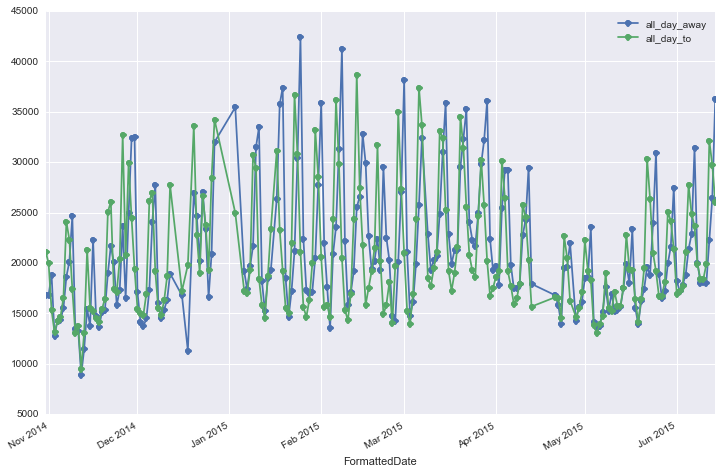

In [41]:
df_traf_ski_plot.plot(marker = 'o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c6c7c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cda8bd0>]], dtype=object)

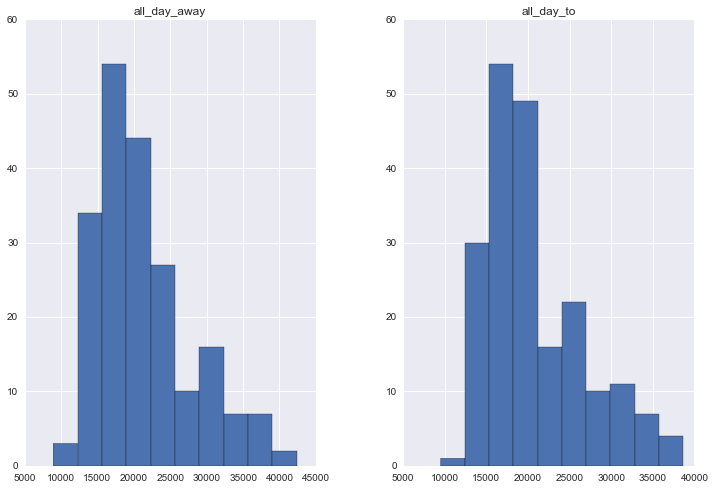

In [42]:
df_traf_ski_plot.hist()

##To Mountains

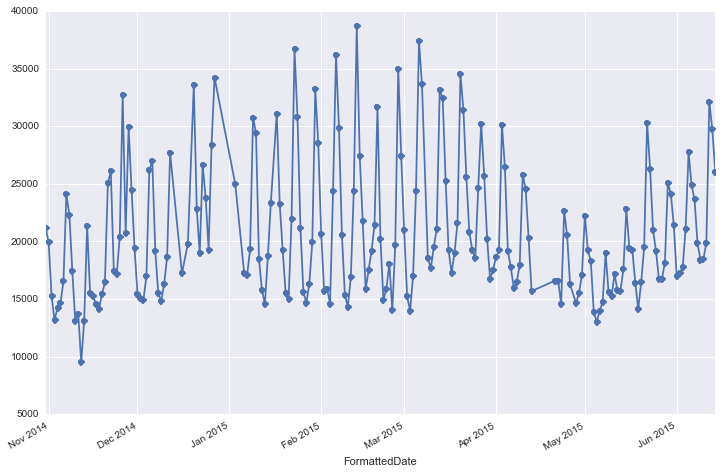

In [43]:
df_traf_ski_prim.all_day_to.plot(marker = 'o')

##Away from Mountains

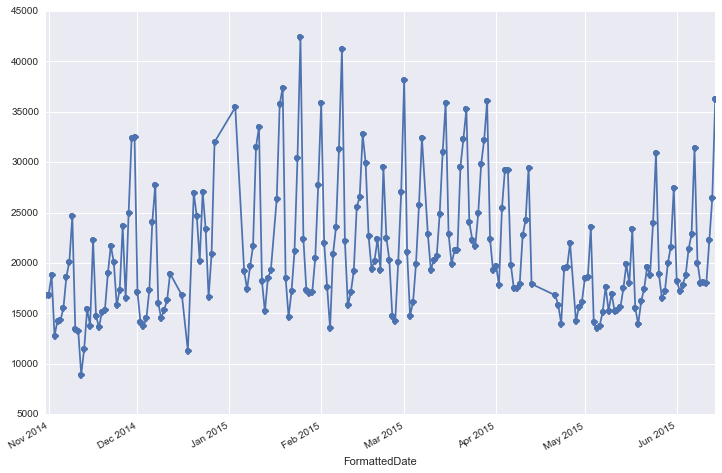

In [32]:
df_traf_ski_prim.all_day_away.plot(marker = 'o')

In [49]:
df_traf_ski_all.to_csv('data/clean_eagle_traffic.csv')

#Eagle Traffic

In [ ]:
df_eagle = pd.DataFrame.from_csv('eagle_traffic.csv', index_col = 27, parse_dates= True)

In [ ]:
df_eagle.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [ ]:
df_eagle = choose_date_range(2015, 1, 1, 2015, 2, 1, df_eagle)

In [ ]:
df_eagle.tail()

In [ ]:
df_eagle_prim, df_eagle_sec = separate_traffic_directions(df_eagle)

In [ ]:
df_eagle_prim, df_eagle_sec = sum_morning_evening_and_drop_hourly(df_eagle_prim, df_eagle_sec)

####Primary is east

In [ ]:
df_eagle_prim.plot(marker = 'o')

In [ ]:
df_eagle_sec.plot(marker = 'o')

In [ ]:
df_traf_ski_all.head()

In [ ]:
df_met.head()

In [62]:
resamp_time = '1440Min'

In [63]:
df_met.head()

,Time,SkyCondition,Visibility,WeatherType,DryBulbCelsius,RelativeHumidity,WindSpeed,HourlyPrecip
Date,,,,,,,,
2015-01-01,16,CLR,10,0,-8,45,10,0
2015-01-01,36,CLR,10,0,-8,45,10,0
2015-01-01,56,CLR,10,0,-8,45,13,0
2015-01-01,116,CLR,10,0,-8,45,22,0
2015-01-01,136,CLR,10,0,-7,45,21,0


#Combine met and traffic data

In [64]:
df_all = pd.concat([df_traf_ski_all.resample(resamp_time), df_met.resample(resamp_time)], axis=1).dropna()

In [65]:
df_all.head()

,morning_away,evening_away,all_day_away,morning_to,evening_to,all_day_to,Time,Visibility,WeatherType,DryBulbCelsius,WindSpeed,HourlyPrecip
Date,,,,,,,,,,,,
2015-01-03,9982,25451,35433,15850,9121,24971,1174.412698,4.150000,0.444444,-10.634921,21.833333,0.000000
2015-01-06,5630,13554,19184,9020,8243,17263,1313.142857,7.130952,0.984127,-0.587302,18.476190,0.000000
2015-01-07,5239,12154,17393,8288,8767,17055,1179.197183,10.000000,0.000000,-0.647887,16.056338,0.000423
2015-01-08,5588,14060,19648,8476,10836,19312,1185.416667,10.000000,0.000000,-0.930556,17.428571,0.000000
2015-01-09,6415,15270,21685,9844,20898,30742,1185.000000,10.000000,0.000000,-2.625000,13.745455,0.000000


In [66]:
df_all_corr = df_all.drop(['morning_away', 'evening_away', 'morning_to', 'evening_to', 'Time', 'WeatherType'], axis = 1)

In [67]:
day_of_week = []
for idx, day in df_all_corr.iterrows():
    day_of_week.append(idx.weekday())
    
df_all_corr['day_of_week'] = day_of_week

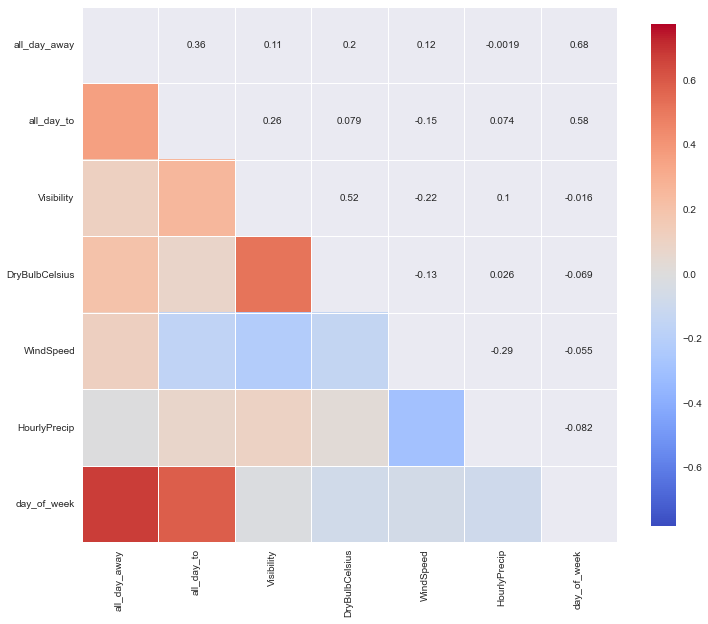

In [68]:
f, ax = plt.subplots(figsize=(12, 12))
sns.corrplot(df_all_corr, annot=True, sig_stars=False,
             diag_names=False, ax=ax)

In [69]:
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()

In [70]:
df_all_corr['day_of_week'].unique()

array([5, 1, 2, 3, 4, 6, 0])

In [71]:
ref_col = 'all_day_to'

In [72]:
list(df_all_corr.columns.values)

['all_day_away',
 'all_day_to',
 'Visibility',
 'DryBulbCelsius',
 'WindSpeed',
 'HourlyPrecip',
 'day_of_week']

In [73]:
features = ['Visibility',
 'DryBulbCelsius',
 'WindSpeed',
 'HourlyPrecip',
 'day_of_week']

In [81]:
def numpy_arrays_for_tr_and_cv(features, df_T, df_CV, ref_column):
    X_T = df_T[features].values
    X_CV = df_CV[features].values
    y_T = df_T[ref_column].values
    y_CV = df_CV[ref_column].values
    return X_T, y_T, X_CV, y_CV

In [82]:
X_T, y_T, X_CV, y_CV = numpy_arrays_for_tr_and_cv(features, df_all_corr, df_all_corr, ref_col)

In [83]:
from sklearn import linear_model

#Define the model.
lin_regr = linear_model.LinearRegression()
fit1 = lin_regr.fit(X_T, y_T) 
df_all_corr['traffic_fit'] = fit1.predict(X_T)

In [84]:
def plot_fitted_and_ref(fitted_data, df_H):
    plt.figure(figsize=(15,5))
    plt.title('Predicted and Reference Traffic Data', fontsize = 30)
    fitted_data.plot(color="r", marker = '.', label = 'fitted')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('Number of Cars', fontsize = 18)
    plt.legend() 
    df_H['O3_ppb'].plot(label = 'reference')
    plt.show()

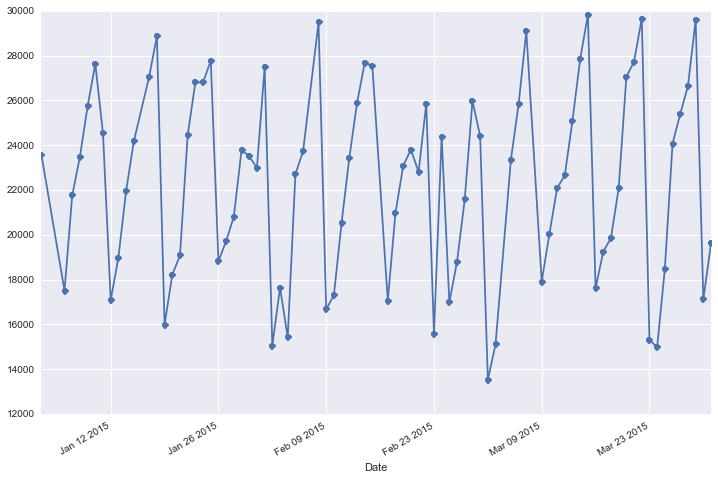

In [85]:
df_all_corr['traffic_fit'].plot(marker = 'o')